In [50]:
import numpy as np
import peakutils
import matplotlib.pyplot as plt
import math
from math import isnan
from scipy.optimize import curve_fit as cf

In [157]:
data = np.genfromtxt('voltageBreakdown.csv', delimiter=',')
gp = 2.27

def col(i):
    return [value for value in data[:,i] if not math.isnan(value)]

def peak(n):
    indexes = peakutils.indexes(np.array(col(n)), thres=0.75, min_dist=30)
    time = [120.5*j/2411 for j in indexes]
    maxVal = []
    for i in indexes:
        maxVal.append(col(n)[i]/gp)
    return time, maxVal

def f(x,A,B):
    return A*np.exp(B*x)

def ramp(n):
    indexes = peakutils.indexes(np.array(col(n)), thres=0.75, min_dist=30)
    volts = col(n)[indexes[3]-50:indexes[3]]
    func, func_cov = cf(f, np.arange(0,50), volts)
    return func*20

plt.rcParams.update({'font.size': 14})

Exponentially-determined breakdown for Air,Ar,CO2,N, respectively:
3.1487653844628687
0.8670904710384255
2.9621322693265837
3.264691106838621


Text(0.5, 0, 'Ramp-up (kV/s)')

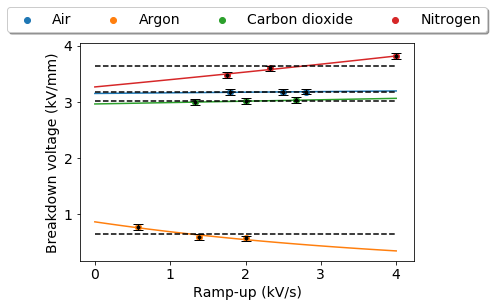

In [158]:
rampAir = [1.8, 2.5, 2.8]
rampAr = [0.57, 1.389, 2]
rampCO2 = [1.33, 2.00, 2.67]
rampN = [1.75, 2.33, 4]

def rampGas(i,j,k, rampGas, l):
    breakVolt = [np.mean([m/l for m in peak(i)[1]]), np.mean([m/l for m in peak(j)[1]]), np.mean([m/l for m in peak(k)[1]])]
    gunc, gunc_cov = cf(f, rampGas, breakVolt)
    return gunc, rampGas, breakVolt

print('Exponentially-determined breakdown for Air,Ar,CO2,N, respectively:')
print(rampGas(4,11,18, rampAir, 1)[0][0])
print(rampGas(25,32,39, rampAr, 2)[0][0])
print(rampGas(46,53,60, rampCO2, 1)[0][0])
print(rampGas(67,74,81, rampN, 1)[0][0])


x = np.linspace(0,4)
y1 = rampGas(4,11,18, rampAir, 1)[0][0]*np.exp(rampGas(4,11,18, rampAir, 1)[0][1]*x)
y2 = rampGas(25,32,39, rampAr, 2)[0][0]*np.exp(rampGas(25,32,39, rampAr, 2)[0][1]*x)
y3 = rampGas(46,53,60, rampCO2, 1)[0][0]*np.exp(rampGas(46,53,60, rampCO2, 1)[0][1]*x)
y4 = rampGas(67,74,81, rampN, 1)[0][0]*np.exp(rampGas(67,74,81, rampN, 1)[0][1]*x)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot([0,4],[np.mean(rampGas(4,11,18, rampAir, 1)[2]),np.mean(rampGas(4,11,18, rampAir, 1)[2])], linestyle='--', color='black')
plt.plot([0,4],[np.mean(rampGas(25,32,39, rampAr, 2)[2]),np.mean(rampGas(25,32,39, rampAr, 2)[2])], linestyle='--', color='black')
plt.plot([0,4],[np.mean(rampGas(46,53,60, rampCO2, 1)[2]),np.mean(rampGas(46,53,60, rampCO2, 1)[2])], linestyle='--', color='black')
plt.plot([0,4],[np.mean(rampGas(67,74,81, rampN, 1)[2]),np.mean(rampGas(67,74,81, rampN, 1)[2])], linestyle='--', color='black')
plt.scatter(rampGas(4,11,18, rampAir, 1)[1], rampGas(4,11,18, rampAir, 1)[2], label='Air')
plt.errorbar(rampGas(4,11,18, rampAir, 1)[1], rampGas(4,11,18, rampAir, 1)[2], yerr=0.05, fmt='k.', capsize=5, elinewidth=1)
plt.scatter(rampGas(25,32,39, rampAr, 2)[1], rampGas(25,32,39, rampAr, 2)[2], label='Argon')
plt.errorbar(rampGas(25,32,39, rampAr, 2)[1], rampGas(25,32,39, rampAr, 2)[2], yerr=0.05, fmt='k.', capsize=5, elinewidth=1)
plt.scatter(rampGas(46,53,60, rampCO2, 1)[1], rampGas(46,53,60, rampCO2, 1)[2], label='Carbon dioxide')
plt.errorbar(rampGas(46,53,60, rampCO2, 1)[1], rampGas(46,53,60, rampCO2, 1)[2], yerr=0.05, fmt='k.', capsize=5, elinewidth=1)
plt.scatter(rampGas(67,74,81, rampN, 1)[1], rampGas(67,74,81, rampN, 1)[2], label='Nitrogen')
plt.errorbar(rampGas(67,74,81, rampN, 1)[1], rampGas(67,74,81, rampN, 1)[2], yerr=0.05, fmt='k.', capsize=5, elinewidth=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5)
plt.ylabel('Breakdown voltage (kV/mm)')
plt.xlabel('Ramp-up (kV/s)')

Text(0.5, 0, 'Time(s)')

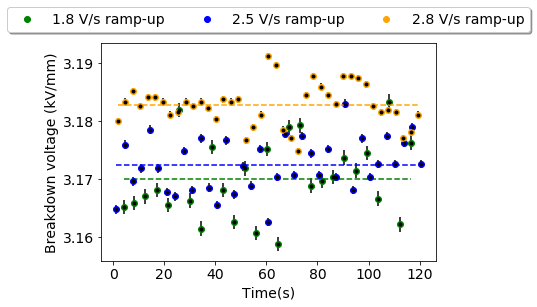

In [159]:
plt.errorbar(peak(4)[0], peak(4)[1], yerr=np.std(peak(4)[1])/np.sqrt(len(peak(4)[1])), fmt='k.')
plt.plot(peak(4)[0], peak(4)[1], color='green', marker = 'o', linestyle = '', label='1.8 V/s ramp-up')
plt.plot(peak(4)[0], [np.mean(peak(4)[1])]*len(peak(4)[1]), linestyle='--', color='green')

plt.errorbar(peak(11)[0], peak(11)[1], yerr=np.std(peak(11)[1])/np.sqrt(len(peak(11)[1])), fmt='k.')
plt.plot(peak(11)[0], peak(11)[1], color='blue', marker = 'o', linestyle = '', label='2.5 V/s ramp-up')
plt.plot(peak(11)[0], [np.mean(peak(11)[1])]*len(peak(11)[1]), linestyle='--', color='blue')

plt.errorbar(peak(18)[0], peak(18)[1], yerr=np.std(peak(18)[1])/np.sqrt(len(peak(18)[1])), fmt='k.')
plt.plot(peak(18)[0], peak(18)[1], color='orange', marker = 'o', linestyle = '', label='2.8 V/s ramp-up')
plt.plot(peak(18)[0], [np.mean(peak(18)[1])]*len(peak(18)[1]), linestyle='--', color='orange')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5)
plt.ylabel('Breakdown voltage (kV/mm)')
plt.xlabel('Time(s)')

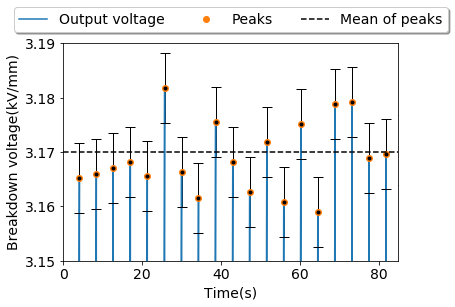

In [160]:
#air, trial 1

def graph(n, xmin, xmax, ymin, ymax, datLabel, peakLabel, lineLabel, l):
    x = [120.5*i/2411 for i in range(0,len(col(n)))]
    y = [j/(l*gp) for j in col(n)]
    adjVolt = [k/l for k in peak(n)[1]]
    plt.axis((xmin,xmax, ymin,ymax))
    plt.plot(x, y, label=datLabel)
    plt.plot(peak(n)[0], adjVolt, 'o', label=peakLabel)
    plt.plot([0,xmax],[np.mean(adjVolt),np.mean(adjVolt)], linestyle='--', color='black', label=lineLabel)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), fancybox=True, shadow=True, ncol=5)
    plt.errorbar(peak(n)[0],adjVolt, yerr=np.std(adjVolt), fmt='k.', capsize=5, elinewidth=1)
    plt.ylabel('Breakdown voltage(kV/mm)')
    plt.xlabel('Time(s)')

graph(4, 0, 85, 3.15, 3.19, 'Output voltage', 'Peaks', 'Mean of peaks', 1)

In [47]:
print('Breakdown voltage of air, with error and ratio relative to air:')
print(np.mean(peak(4)[1]+peak(11)[1]+peak(18)[1]))
print(np.std(peak(4)[1]+peak(11)[1]+peak(18)[1]))
print(np.mean(peak(4)[1]+peak(11)[1]+peak(18)[1])/np.mean(peak(4)[1]+peak(11)[1]+peak(18)[1]))

print('Breakdown voltage of argon, with error and ratio relative to air:')
print(np.mean(peak(25)[1]+peak(32)[1]+peak(39)[1])/2)
print(np.std(peak(25)[1]+peak(32)[1]+peak(39)[1])/2)
print(np.mean(peak(25)[1]+peak(32)[1]+peak(39)[1])/(2*np.mean(peak(4)[1]+peak(11)[1]+peak(18)[1])))

print('Breakdown voltage of carbon dioxide, with error and ratio relative to air')
print(np.mean(peak(46)[1]+peak(53)[1]+peak(60)[1]))
print(np.std(peak(46)[1]+peak(53)[1]+peak(60)[1]))
print(np.mean(peak(46)[1]+peak(11)[1]+peak(60)[1])/np.mean(peak(4)[1]+peak(11)[1]+peak(18)[1]))

print('Breakdown voltage of nitrogen, with error and ratio relative to air')
print(np.mean(peak(67)[1]+peak(74)[1]+peak(81)[1]))
print(np.std(peak(67)[1]+peak(74)[1]+peak(81)[1]))
print(np.mean(peak(67)[1]+peak(74)[1]+peak(81)[1])/np.mean(peak(4)[1]+peak(11)[1]+peak(18)[1]))

Breakdown voltage of air, with error and ratio relative to air:
3.1758483245149915
0.007367209311778546
1.0
Breakdown voltage of argon, with error and ratio relative to air:
0.6188857765328354
0.07995221244212482
0.19487258624901435
Breakdown voltage of carbon dioxide, with error and ratio relative to air
3.01462768031189
0.020525890378402134
0.9674471797042214
Breakdown voltage of nitrogen, with error and ratio relative to air
3.6603385416666665
0.14352116206752732
1.152554583105182
